# Display function 

In [14]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

# Binarization

In [44]:
import cv2

def binary(img_path):
    # Read the image
    img = cv2.imread(img_path)

    # Check if the image is read successfully
    if img is None:
        print("Error: Could not read the image.")
        return

    # Invert the image
    inverted_image = cv2.bitwise_not(img)

    # Save the inverted image
    cv2.imwrite("inverted1.jpg", inverted_image)

# Call the function with the image path
binary("inverted.jpg")

In [26]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [27]:
gray_image = grayscale(cv2.imread("inverted1.jpg"))
cv2.imwrite("gray.jpg", gray_image)

True

In [29]:
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("bw_image.jpg", im_bw)

True

# Noise Removal 


In [22]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [28]:
no_noise = noise_removal(im_bw)
cv2.imwrite("no_noise.jpg", no_noise)

True

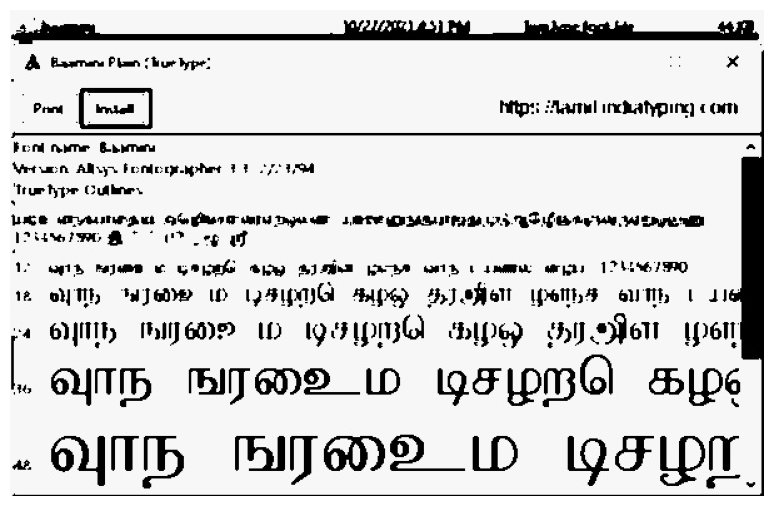

In [29]:
display("no_noise.jpg")

# Dilation and Erosion

In [35]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [36]:
eroded_image = thin_font(no_noise)
cv2.imwrite("eroded_image.jpg", eroded_image)

True

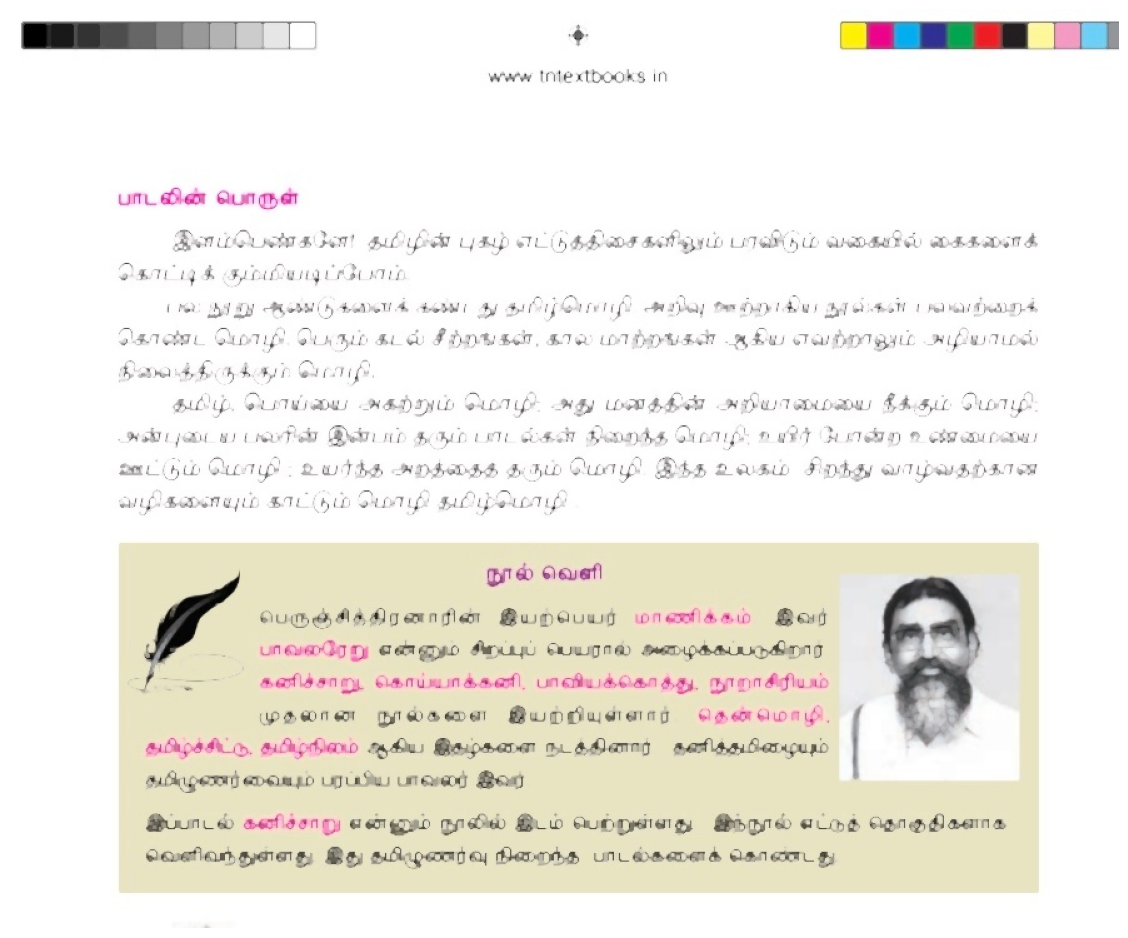

In [37]:
display("eroded_image.jpg")

In [38]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [39]:
dilated_image = thick_font(no_noise)
cv2.imwrite("dilated_image.jpg", dilated_image)

True

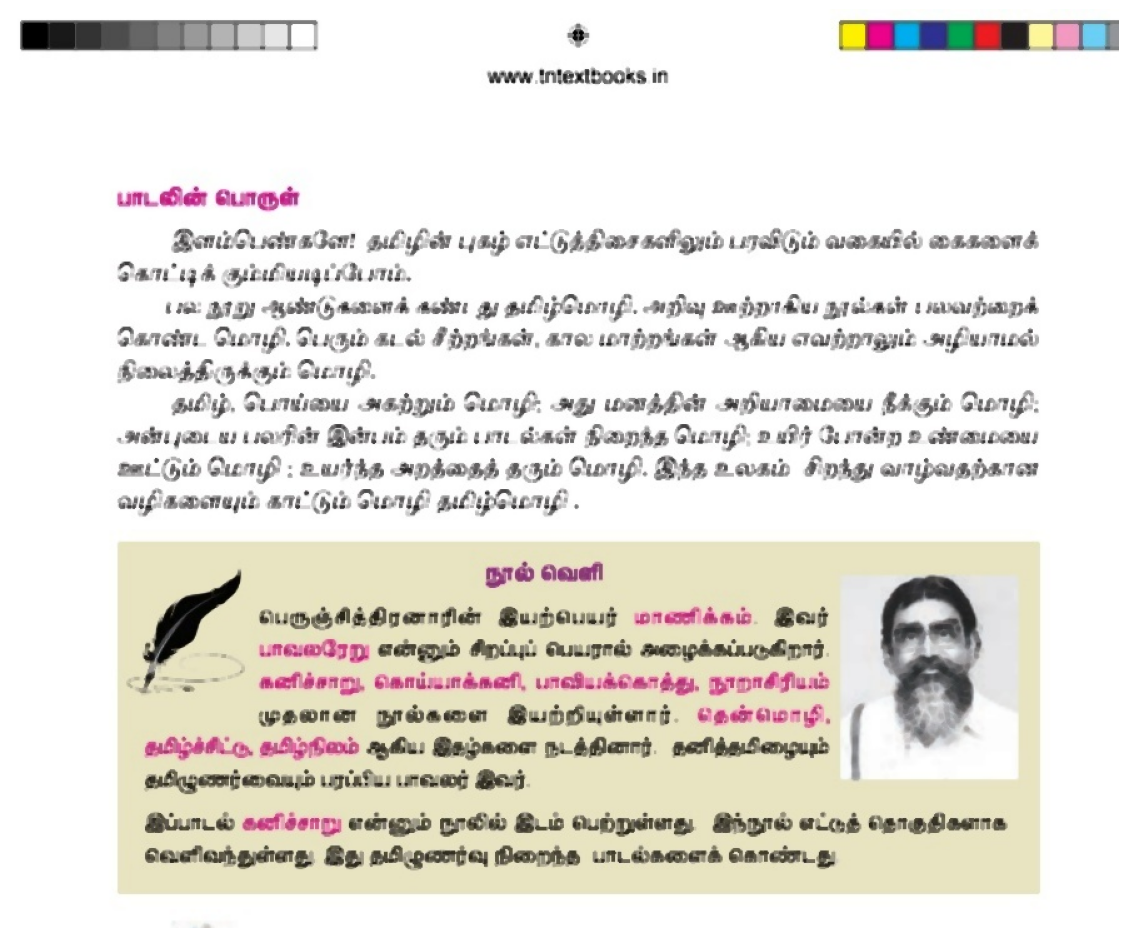

In [40]:
display("dilated_image.jpg")

In [41]:
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage


In [42]:
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)


In [55]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)


## pdf

In [22]:
pip install pymupdf



SyntaxError: invalid syntax (1902983955.py, line 1)

In [21]:
pip install langdetect


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---- --------------------------------- 112.6/981.5 kB 3.2 MB/s eta 0:00:01
     -------- ----------------------------- 225.3/981.5 kB 2.7 MB/s eta 0:00:01
     -------------- ----------------------- 368.6/981.5 kB 2.9 MB/s eta 0:00:01
     -------------------- ----------------- 532.5/981.5 kB 3.0 MB/s eta 0:00:01
     ------------------------ ------------- 645.1/981.5 kB 2.9 MB/s eta 0:00:01
     ------------------------------ ------- 798.7/981.5 kB 3.0 MB/s eta 0:00:01
     -------------------------------------  972.8/981.5 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993273 sha256=37f7c2ec5cb009b79196620b03741cd8e7eb619eb02a310448f571a68dd6e0bd
  Stored in directory: c:\

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [25]:
import fitz  # PyMuPDF
from PIL import Image
import pytesseract

# Set the path to the Tesseract executable
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Open a PDF file (replace 'example.pdf' with your PDF file)
pdf_document = 'multi.pdf'
pdf_file = fitz.open(pdf_document)

# Iterate through each page of the PDF
for page_number in range(pdf_file.page_count):
    # Get the page
    page = pdf_file[page_number]

    # Convert the PDF page to an image
    img = page.get_pixmap()

    # Use pytesseract to extract text from the image
    text = pytesseract.image_to_string(Image.frombytes("RGB", (img.width, img.height), img.samples), lang= "tam+Telugu+Kannada+en")

    # Print the extracted text
    print(f"Page {page_number + 1}:\n{text}\n")

# Close the PDF file
pdf_file.close()


Page 1:
తెలుగు కన్నడ
telugu kannada

తేలుగు ಕನ್ನಡ

telugu kannada

Telugu:

Kannada:




In [26]:
from docx import Document

# Open a DOCX file (replace 'example.docx' with your DOCX file)
docx_document = 'ieee.docx'
doc = Document(docx_document)

# Extract text from paragraphs in the document
text = '\n'.join([paragraph.text for paragraph in doc.paragraphs])

# Print the extracted text
print(text)


Recent Advancements in Cloud Security Using Performance Technologies and Techniques
Vamshidhar Reddy Vemula
 Intalent LLC
555 Republic Dr 425, Plano
 TX, USA 75074
vvamshidharreddy1@gmail.com

Abstract— This study examines the numerous approaches to cybersecurity and cloud computing offered by various authors in the past. Coverage includes cloud computing intrusion detection and prevention systems, cloud forensics and anti-forensics technologies, strategies for enhancing security and privacy in cloud environments, key management and cryptographic strategies, securing multi-cloud environments, cloud computing confidentiality, and distributed authentication and authorization schemes for big data sharing. These studies provide useful information on the most recent techniques used to safeguard private data, ensure cloud security, and improve cloud services. The study emphasizes the significance of robust security measures, data protection, and efficient administration strategies in a cloud

# pytess


In [5]:
import pytesseract
from PIL import Image

In [6]:
imgfile = "multi.webp"
no_noise = "no_noise.jpg"

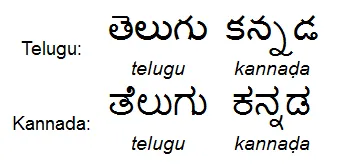

In [7]:
img = Image.open(imgfile)
img

In [8]:
ocr_res = pytesseract.image_to_string(img, lang='Telugu+Kannada+en')  # Replace 'tel+tam' with the desired languages



In [9]:
print(ocr_res)

తెలుగు కన్నడ
telugu kannada

ತೆಲುಗು ಕನ್ನಡ

telugu kannada

Telugu:

Kannada:



# chr() code


In [10]:
m, n = 10241 ,10495

l = list()

for i in range(m , m+64):
    if i not in l:
        l.append(chr(i))

print(l)

['⠁', '⠂', '⠃', '⠄', '⠅', '⠆', '⠇', '⠈', '⠉', '⠊', '⠋', '⠌', '⠍', '⠎', '⠏', '⠐', '⠑', '⠒', '⠓', '⠔', '⠕', '⠖', '⠗', '⠘', '⠙', '⠚', '⠛', '⠜', '⠝', '⠞', '⠟', '⠠', '⠡', '⠢', '⠣', '⠤', '⠥', '⠦', '⠧', '⠨', '⠩', '⠪', '⠫', '⠬', '⠭', '⠮', '⠯', '⠰', '⠱', '⠲', '⠳', '⠴', '⠵', '⠶', '⠷', '⠸', '⠹', '⠺', '⠻', '⠼', '⠽', '⠾', '⠿', '⡀']


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_text = label_encoder.fit_transform(l)

print(encoded_text)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [17]:
# Sample dataset
texts = ["⠁⠻⠊⠽", "⠃⠑⠍⠽", "⠇⠻⠎⠞"]

# Convert Braille characters to numerical values using ord()
numerical_values = [[ord(char) for char in text] for text in texts]

print(numerical_values)


[[10241, 10299, 10250, 10301], [10243, 10257, 10253, 10301], [10247, 10299, 10254, 10270]]
